In [10]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import MaxPooling2D, GlobalAveragePooling2D, Concatenate, DepthwiseConv2D, Lambda, Reshape, Layer, add, Dense, multiply

from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import skimage
import skimage.transform
import cv2

In [2]:
!nvidia-smi

Sat May 15 09:41:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 446.14       Driver Version: 446.14       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce MX150      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P8    N/A /  N/A |     64MiB /  2048MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [3]:
!nvidia-smi

Wed Dec 08 22:41:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 446.14       Driver Version: 446.14       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce MX150      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   54C    P0    N/A /  N/A |     64MiB /  2048MiB |      3%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

# 1. Data Exploration

In [3]:
img1 = cv2.imread("./img30/1.png")
img2 = cv2.imread("./segementation test/0001_pix.png")
print(img1.shape,img2.shape)

(914, 880, 3) (439, 423, 3)


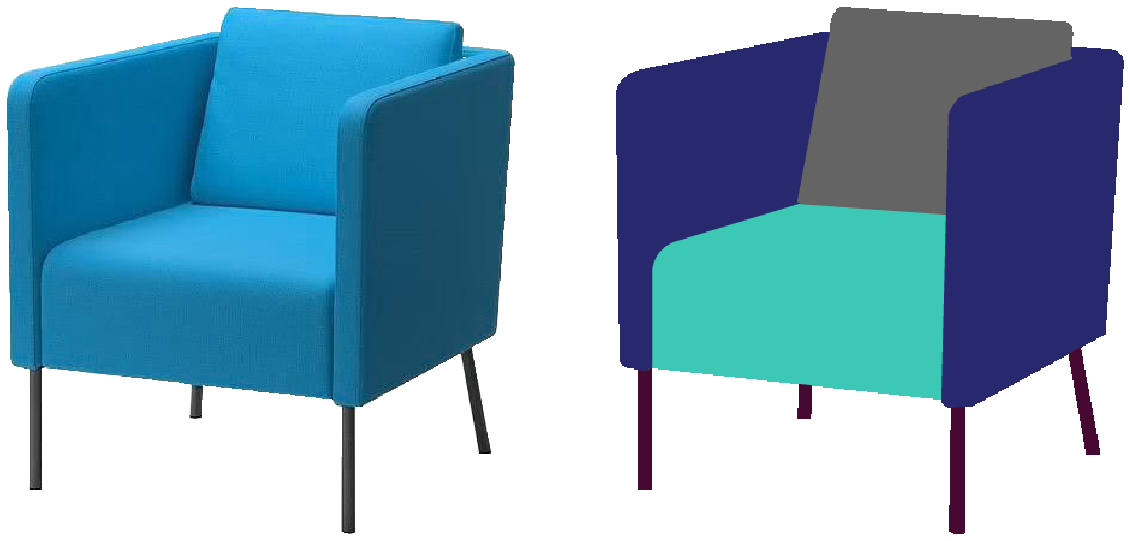

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(img2)

In [6]:
for i in range(29):
    s1="./img33/"+str(126+i)+".png"
    s2="./img33/0"+str(126+i)+"_pix.png"
    img1 = cv2.imread(s1)
    img2 = cv2.imread(s2)
    print(i+126)
    print(img1.shape,img2.shape)
    i+=1

126
(828, 542, 3) (826, 540, 3)
127
(851, 563, 3) (853, 565, 3)
128
(819, 552, 3) (820, 551, 3)
129
(842, 597, 3) (840, 599, 3)
130
(862, 563, 3) (862, 564, 3)
131
(866, 568, 3) (863, 569, 3)
132
(839, 567, 3) (838, 566, 3)
133
(852, 572, 3) (850, 576, 3)
134
(811, 543, 3) (808, 544, 3)
135
(817, 573, 3) (816, 573, 3)
136
(878, 549, 3) (878, 549, 3)
137
(880, 617, 3) (1000, 1000, 3)
138
(873, 645, 3) (874, 647, 3)
139
(880, 586, 3) (878, 585, 3)
140
(936, 678, 3) (703, 509, 3)
141
(534, 395, 3) (535, 398, 3)
142
(874, 632, 3) (872, 631, 3)
143
(875, 643, 3) (874, 641, 3)
144
(846, 567, 3) (843, 1070, 3)
145
(860, 595, 3) (858, 596, 3)
146
(882, 630, 3) (882, 631, 3)
147
(801, 634, 3) (803, 634, 3)
148
(805, 632, 3) (807, 634, 3)
149
(835, 622, 3) (839, 622, 3)
150
(906, 629, 3) (909, 627, 3)
151
(794, 558, 3) (798, 558, 3)
152
(821, 608, 3) (821, 605, 3)
153
(842, 588, 3) (840, 591, 3)
154
(804, 571, 3) (805, 569, 3)


In [11]:
src_images=[]; tar_images=[]
for i in range(29):
    s1="./img33/"+str(126+i)+".png"
    s2="./img33/0"+str(126+i)+"_pix.png"
    img1 = cv2.imread(s1)
    img2 = cv2.imread(s2)
    img1 = skimage.transform.resize(img1, (600, 600, 3))
    img2 = skimage.transform.resize(img2, (600, 600, 3))
    src_images.append(img1)
    tar_images.append(img2)
    print(i+126)
    print(img1.shape,img2.shape)
    i+=1

C:\Users\user\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


126
(800, 600, 3) (800, 600, 3)
127
(800, 600, 3) (800, 600, 3)
128
(800, 600, 3) (800, 600, 3)
129
(800, 600, 3) (800, 600, 3)
130
(800, 600, 3) (800, 600, 3)
131
(800, 600, 3) (800, 600, 3)
132
(800, 600, 3) (800, 600, 3)
133
(800, 600, 3) (800, 600, 3)
134
(800, 600, 3) (800, 600, 3)
135
(800, 600, 3) (800, 600, 3)
136
(800, 600, 3) (800, 600, 3)
137
(800, 600, 3) (800, 600, 3)
138
(800, 600, 3) (800, 600, 3)
139
(800, 600, 3) (800, 600, 3)
140
(800, 600, 3) (800, 600, 3)
141
(800, 600, 3) (800, 600, 3)
142
(800, 600, 3) (800, 600, 3)
143
(800, 600, 3) (800, 600, 3)
144
(800, 600, 3) (800, 600, 3)
145
(800, 600, 3) (800, 600, 3)
146
(800, 600, 3) (800, 600, 3)
147
(800, 600, 3) (800, 600, 3)
148
(800, 600, 3) (800, 600, 3)
149
(800, 600, 3) (800, 600, 3)
150
(800, 600, 3) (800, 600, 3)
151
(800, 600, 3) (800, 600, 3)
152
(800, 600, 3) (800, 600, 3)
153
(800, 600, 3) (800, 600, 3)
154
(800, 600, 3) (800, 600, 3)


In [84]:
src_images=[]; tar_images=[]
size=(256,256)
for i in range(29):
    s1="./img33/"+str(126+i)+".png"
    s2="./img33/0"+str(126+i)+"_pix.png"
    pixels1 = load_img(s1, target_size=size)
    pixels2 = load_img(s2, target_size=size)
    pixels1 = img_to_array(pixels1)
    pixels2 = img_to_array(pixels2)
    src_images.append(pixels1)
    tar_images.append(pixels2)
    print(i+126)
    print(img1.shape,img2.shape)
    i+=1

126
(800, 600, 3) (800, 600, 3)
127
(800, 600, 3) (800, 600, 3)
128
(800, 600, 3) (800, 600, 3)
129
(800, 600, 3) (800, 600, 3)
130
(800, 600, 3) (800, 600, 3)
131
(800, 600, 3) (800, 600, 3)
132
(800, 600, 3) (800, 600, 3)
133
(800, 600, 3) (800, 600, 3)
134
(800, 600, 3) (800, 600, 3)
135
(800, 600, 3) (800, 600, 3)
136
(800, 600, 3) (800, 600, 3)
137
(800, 600, 3) (800, 600, 3)
138
(800, 600, 3) (800, 600, 3)
139
(800, 600, 3) (800, 600, 3)
140
(800, 600, 3) (800, 600, 3)
141
(800, 600, 3) (800, 600, 3)
142
(800, 600, 3) (800, 600, 3)
143
(800, 600, 3) (800, 600, 3)
144
(800, 600, 3) (800, 600, 3)
145
(800, 600, 3) (800, 600, 3)
146
(800, 600, 3) (800, 600, 3)
147
(800, 600, 3) (800, 600, 3)
148
(800, 600, 3) (800, 600, 3)
149
(800, 600, 3) (800, 600, 3)
150
(800, 600, 3) (800, 600, 3)
151
(800, 600, 3) (800, 600, 3)
152
(800, 600, 3) (800, 600, 3)
153
(800, 600, 3) (800, 600, 3)
154
(800, 600, 3) (800, 600, 3)


In [85]:
# save as compressed numpy array
filename = 'img30.npz'
savez_compressed(filename, src_images, tar_images)
print('Saved dataset: ', filename)

Saved dataset:  img30.npz


Loaded:  (29, 256, 256, 3) (29, 256, 256, 3)


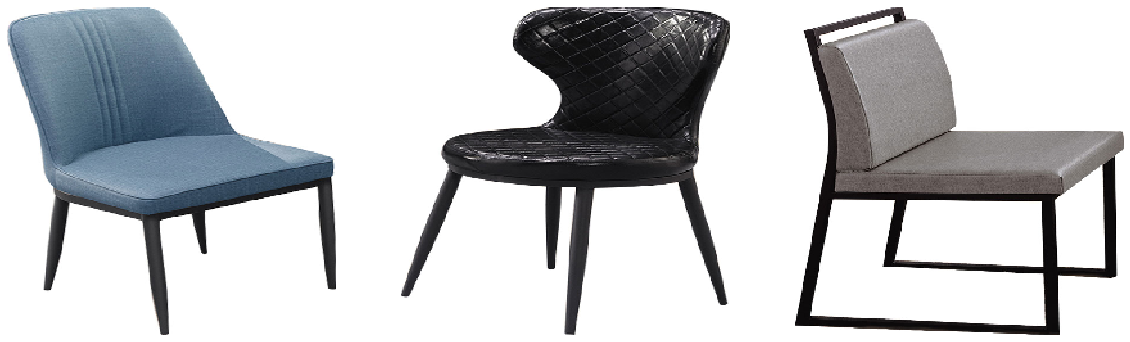

In [86]:
# load the prepared dataset
from numpy import load
import matplotlib.pyplot as plt
%matplotlib inline
# load the dataset
data = load('img30.npz')
src_images, tar_images = data['arr_0'], data['arr_1']
print('Loaded: ', src_images.shape, tar_images.shape)
# plot source images
n_samples = 3
plt.figure(figsize=(20,20))
for i in range(n_samples):
    plt.subplot(2, n_samples, 1 + i)
    plt.axis('off')
    plt.imshow(src_images[i].astype('uint8'))

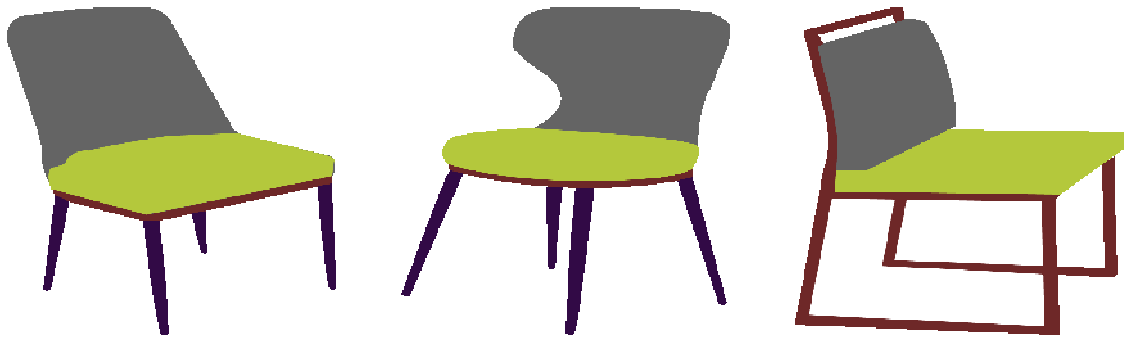

In [87]:
# plot target image
plt.figure(figsize=(20,20))
for i in range(n_samples):
    plt.subplot(2, n_samples, 1 + n_samples + i)
    plt.axis('off')
    plt.imshow(tar_images[i].astype('uint8'))

A plot of three image pairs is also created showing the satellite images on the top and Google map images on the bottom.
We can see that satellite images are quite complex and that although the Google map images are much simpler, they have color codings for things like major roads, water, and parks.

# 2. Model-Pix2Pix with SP&A
The architecture is comprised of two models: the discriminator and the generator.

##  Squeeze and Excitation

In [88]:
#from keras_layer_normalization import LayerNormalization
def squeeze_excite_block(input, ratio=16):
    init = input
    filters = init._keras_shape[-1]
    se_shape = (1, 1, filters)
    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', use_bias=False)(se)
    x = multiply([init, se])
    return x

In [89]:
## Self-Attention Block
def Self_Attention_Block(inputs, filters, ratio):
    x = inputs
    x1 = Conv2D(1, (1, 1), strides=(1, 1), padding='same', use_bias=False, activation=None)(x)
    self_attention = Activation('softmax')(x1)
    #x = x * self_attention
    x = multiply([x, self_attention])
    x = Reshape((1, 1, int(x.shape[1])))(x)
    x = Conv2D(int(filters / ratio), (1, 1), strides=(1, 1), padding='same', use_bias=False, activation=None)(x)
    x = Activation('relu')(x)
    x = Conv2D(int(filters), (1, 1), strides=(1, 1), padding='same', use_bias=False, activation=None)(x)
    x = Activation('hard_sigmoid')(x)
    #x = inputs * excitation
    m = add([x, init])
    return m

In [90]:
def Self_Proliferate_Block(inputs, out, ratio, convkernel, dwkernel):
    x = inputs
    conv_out_channel = ceil(out * 1.0 / ratio)
    x = Conv2D(int(conv_out_channel), (convkernel, convkernel), use_bias=False,
               strides=(1, 1), padding='same', activation=None)(x)
    if ratio == 1:
        return x
    else:
        dw = DepthwiseConv2D(dwkernel, 1, padding='same', use_bias=False,
                            depth_multiplier=ratio-1, activation=None)(x)
        dw = dw[:, :, :, :int(out - conv_out_channel)]
        output = Concatenate()([x, dw])
        return output

In [91]:
def Self_Proliferate_and_Attention_Block(inputs, dwkernel, exp, out, ratio):
    x = DepthwiseConv2D(dwkernel, strides, padding='same', depth_multiplier=ratio-1,
                        activation=None, use_bias=False)(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(out, (1, 1), strides=(1, 1), padding='same', activation=None, use_bias=False)(x)
    x = BatchNormalization()(x)
    y = Self_Proliferate_Block(inputs, exp, ratio, 1, 3) # inputs, out, ratio(s=2, 50%), convkernel(k=1), dwkernel(d=3)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = DepthwiseConv2D(dwkernel, strides, padding='same', depth_multiplier=ratio-1, 
                        activation=None, use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    Self_Attention_Block(y, exp, ratio)
    y = Self_Proliferate_Block(y, out, ratio, 1, 3)
    y = BatchNormalization()(y)
    return add([x, y])

## 2.1 Discriminator
The discriminator is a deep convolutional neural network that performs image classification. Specifically, **conditional-image classification**. It takes both the **source image** (e.g. satellite photo) and the **target image** (e.g. Google maps image) as input and predicts the **likelihood** of whether target image is real or a fake translation of the source image.

The discriminator design is based on the **effective receptive field** of the model, which defines the relationship between one output of the model to the number of pixels in the input image. This is called a **PatchGAN** model and is carefully designed so that each output prediction of the model maps to a **70×70** square or patch of the input image. The benefit of this approach is that the same model can be applied to input images of different sizes, e.g. larger or smaller than 256×256 pixels.

The output of the model depends on the size of the input image but may be one value or a **square activation map** of values. Each value is a **probability** for the likelihood that a **patch** in the input image is real. These values can be **averaged** to give an overall likelihood or classification score if needed.

The **define_discriminator()** function below implements the **70×70 PatchGAN** discriminator model as per the design of the model in the paper. The model takes two input images that are concatenated together and predicts a patch output of predictions. The model is optimized using **binary cross entropy**, and a weighting is used so that updates to the model have half (**0.5**) the usual effect. The authors of Pix2Pix recommend this weighting of model updates to slow down changes to the discriminator, relative to the generator model during training.

In [92]:
def define_discriminator(image_shape):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # source image input
    in_src_image = Input(shape=image_shape)
    # target image input
    in_target_image = Input(shape=image_shape)
    # concatenate images channel-wise
    merged = Concatenate()([in_src_image, in_target_image])
    # C64
    d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
    d = LeakyReLU(alpha=0.2)(d)
    # C128
    d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # C256
    d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # C512
    d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # second last output layer
    d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # patch output
    d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
    patch_out = Activation('sigmoid')(d)
    # define model
    model = Model([in_src_image, in_target_image], patch_out)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
    return model

## 2.2 Generator

In [93]:
# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True, SE=False):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # add downsampling layer
    g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    # conditionally add batch normalization
    if batchnorm:
        g = BatchNormalization()(g, training=True)
    # leaky relu activation
    g = LeakyReLU(alpha=0.2)(g)
    
    
    g = Self_Proliferate_and_Attention_Block(g, dwkernel=3, exp=n_filters*2, out=n_filters, ratio=2)
    # squeeze_excite_block
    if(SE):
        g=squeeze_excite_block(g, ratio=16)
    return g

In [94]:
# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True, SE=False):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # add downsampling layer
    g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    # conditionally add batch normalization
    if batchnorm:
        g = BatchNormalization()(g, training=True)
    # leaky relu activation
    g = LeakyReLU(alpha=0.2)(g)
    # squeeze_excite_block
    if(SE):
        g=squeeze_excite_block(g, ratio=16)
    return g

In [95]:
# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # add upsampling layer
    g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    # add batch normalization
    g = BatchNormalization()(g, training=True)
    # conditionally add dropout
    g = squeeze_excite_block(g, ratio=16)
    #if dropout:
        #g = Dropout(0.5)(g, training=True)
    # merge with skip connection
    g = Concatenate()([g, skip_in])
    # relu activation
    g = Activation('relu')(g)
    return g

In [96]:
# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # image input
    in_image = Input(shape=image_shape)
    # encoder model
    e1 = define_encoder_block(in_image, 64, batchnorm=False, SE=True)
    e2 = define_encoder_block(e1, 128, SE=True)
    e3 = define_encoder_block(e2, 256, SE=True)
    e4 = define_encoder_block(e3, 512, SE=True)
    e5 = define_encoder_block(e4, 512, SE=True)
    e6 = define_encoder_block(e5, 512, SE=True)
    e7 = define_encoder_block(e6, 512, SE=True)
    # bottleneck, no batch norm and relu
    b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
    b = Activation('relu')(b)
    # decoder model
    d1 = decoder_block(b, e7, 512)
    d2 = decoder_block(d1, e6, 512)
    d3 = decoder_block(d2, e5, 512)
    d4 = decoder_block(d3, e4, 512, dropout=False)
    d5 = decoder_block(d4, e3, 256, dropout=False)
    d6 = decoder_block(d5, e2, 128, dropout=False)
    d7 = decoder_block(d6, e1, 64, dropout=False)
    # output
    g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
    out_image = Activation('tanh')(g)
    # define model
    model = Model(in_image, out_image)
    return model

## 2.3 pix-pix GAN

In [97]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
    # make weights in the discriminator not trainable
    for layer in d_model.layers:
        if not isinstance(layer, BatchNormalization):
            layer.trainable = False
    # define the source image
    in_src = Input(shape=image_shape)
    # connect the source image to the generator input
    gen_out = g_model(in_src)
    # connect the source input and generator output to the discriminator input
    dis_out = d_model([in_src, gen_out])
    # src image as input, generated image and classification output
    model = Model(in_src, [dis_out, gen_out])
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
    return model

# 3. Model Training

In [98]:
# load and prepare training images
def load_real_samples(filename):
    # load compressed ararys
    data = load(filename)
    # unpack arrays
    X1, X2 = data['arr_0'], data['arr_1']
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]

In [99]:
# load image data
dataset = load_real_samples('img30.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)

Loaded (29, 256, 256, 3) (29, 256, 256, 3)


In [100]:
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
image_shape

(256, 256, 3)

In [101]:
def generate_real_samples(dataset, n_samples, patch_shape):
    # unpack dataset
    trainA, trainB = dataset
    # choose random instances
    ix = randint(0, trainA.shape[0], n_samples)
    # retrieve selected images
    X1, X2 = trainA[ix], trainB[ix]
    # generate 'real' class labels (1)
    y = ones((n_samples, patch_shape, patch_shape, 1))
    return [X1, X2], y

In [102]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
    # generate fake instance
    X = g_model.predict(samples)
    # create 'fake' class labels (0)
    y = zeros((len(X), patch_shape, patch_shape, 1))
    return X, y

In [103]:
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, dataset, n_samples=3):
    # select a sample of input images
    [X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
    # generate a batch of fake samples
    X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
    # scale all pixels from [-1,1] to [0,1]
    X_realA = (X_realA + 1) / 2.0
    X_realB = (X_realB + 1) / 2.0
    X_fakeB = (X_fakeB + 1) / 2.0
    # plot real source images
    for i in range(n_samples):
        pyplot.subplot(3, n_samples, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(X_realA[i])
    # plot generated target image
    for i in range(n_samples):
        pyplot.subplot(3, n_samples, 1 + n_samples + i)
        pyplot.axis('off')
        pyplot.imshow(X_fakeB[i])
    # plot real target image
    for i in range(n_samples):
        pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
        pyplot.axis('off')
        pyplot.imshow(X_realB[i])
    # save plot to file
    filename1 = 'plot_%06d.png' % (step+1)
    pyplot.savefig(filename1)
    pyplot.close()
    # save the generator model
    filename2 = 'model_%06d.h5' % (step+1)
    g_model.save(filename2)
    print('>Saved: %s and %s' % (filename1, filename2))

In [104]:
trainA, trainB = dataset
len(trainA) / 1

29.0

In [105]:
def train(d_model, g_model, gan_model, dataset, n_epochs=100, n_batch=1):
    # determine the output square shape of the discriminator
    n_patch = d_model.output_shape[1]
    # unpack dataset
    trainA, trainB = dataset
    # calculate the number of batches per training epoch
    bat_per_epo = int(len(trainA) / n_batch)
    # calculate the number of training iterations
    n_steps = bat_per_epo * n_epochs
    # manually enumerate epochs
    for i in range(n_steps):
        # select a batch of real samples
        [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
        # generate a batch of fake samples
        X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
        # update discriminator for real samples
        d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
        # update discriminator for generated samples
        d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
        # update the generator
        g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
        # summarize performance
        print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
        # summarize model performance
        if (i+1) % (bat_per_epo * 1) == 0:
            summarize_performance(i, g_model, dataset)

In [106]:
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)

In [107]:
d_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
concatenate_7 (Concatenate)     (None, 256, 256, 6)  0           input_10[0][0]                   
                                                                 input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 128, 128, 64) 6208        concatenate_7[0][0]              
__________

In [108]:
g_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 128, 128, 64) 3136        input_12[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_42 (LeakyReLU)      (None, 128, 128, 64) 0           conv2d_49[0][0]                  
__________________________________________________________________________________________________
global_average_pooling2d_25 (Gl (None, 64)           0           leaky_re_lu_42[0][0]             
__________________________________________________________________________________________________
reshape_25

In [109]:
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)

In [110]:
gan_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
model_5 (Model)                 (None, 256, 256, 3)  54712963    input_13[0][0]                   
__________________________________________________________________________________________________
model_4 (Model)                 (None, 16, 16, 1)    6968257     input_13[0][0]                   
                                                                 model_5[1][0]                    
Total params: 61,681,220
Trainable params: 54,705,923
Non-trainable params: 6,975,297
__________________________________________________________________________________________________


In [138]:
# train model
train(d_model, g_model, gan_model, dataset, n_epochs=50)

C:\Users\user\Anaconda3\lib\site-packages\keras\engine\training.py:478: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, d1[0.383] d2[0.251] g[13.523]
>2, d1[0.449] d2[0.422] g[9.721]
>3, d1[0.072] d2[0.108] g[56.228]
>4, d1[0.492] d2[0.382] g[13.458]
>5, d1[0.196] d2[0.275] g[10.906]
>6, d1[0.354] d2[0.336] g[11.296]
>7, d1[0.502] d2[0.553] g[12.883]
>8, d1[0.183] d2[0.155] g[14.644]
>9, d1[0.210] d2[0.076] g[35.351]
>10, d1[0.105] d2[0.077] g[32.910]
>11, d1[0.222] d2[0.402] g[12.075]
>12, d1[0.228] d2[0.326] g[17.631]
>13, d1[0.523] d2[0.298] g[9.440]
>14, d1[0.098] d2[0.066] g[32.676]
>15, d1[0.071] d2[0.059] g[31.566]
>16, d1[0.339] d2[0.451] g[9.443]
>17, d1[0.260] d2[0.575] g[9.695]
>18, d1[0.496] d2[0.261] g[8.715]
>19, d1[0.212] d2[0.243] g[9.538]
>20, d1[0.202] d2[0.185] g[8.747]
>21, d1[0.179] d2[0.210] g[20.175]
>22, d1[0.400] d2[0.223] g[9.332]
>23, d1[0.176] d2[0.222] g[14.674]
>24, d1[0.423] d2[0.566] g[12.736]
>25, d1[0.320] d2[0.158] g[9.599]
>26, d1[0.226] d2[0.307] g[13.822]
>27, d1[0.302] d2[0.357] g[11.838]
>28, d1[0.712] d2[0.376] g[9.085]
>29, d1[0.121] d2[0.242] g[16.196]
>Sav

>226, d1[0.052] d2[0.192] g[11.223]
>227, d1[0.104] d2[0.019] g[13.511]
>228, d1[0.293] d2[0.048] g[12.439]
>229, d1[0.084] d2[0.143] g[10.005]
>230, d1[0.066] d2[0.146] g[9.914]
>231, d1[0.219] d2[0.263] g[9.662]
>232, d1[0.014] d2[0.032] g[55.560]
>Saved: plot_000232.png and model_000232.h5
>233, d1[1.511] d2[0.877] g[6.299]
>234, d1[0.377] d2[0.400] g[15.073]
>235, d1[0.017] d2[0.060] g[51.397]
>236, d1[0.191] d2[0.078] g[9.898]
>237, d1[0.055] d2[0.089] g[13.901]
>238, d1[0.049] d2[0.034] g[18.061]
>239, d1[0.082] d2[0.047] g[30.104]
>240, d1[0.104] d2[0.283] g[11.088]
>241, d1[0.095] d2[0.073] g[11.169]
>242, d1[0.251] d2[0.176] g[12.026]
>243, d1[0.266] d2[0.072] g[11.511]
>244, d1[0.021] d2[0.263] g[10.220]
>245, d1[0.201] d2[0.204] g[10.419]
>246, d1[0.173] d2[0.412] g[10.809]
>247, d1[0.608] d2[0.218] g[7.713]
>248, d1[0.156] d2[0.087] g[11.163]
>249, d1[0.085] d2[0.236] g[10.699]
>250, d1[0.087] d2[0.026] g[9.342]
>251, d1[0.031] d2[0.055] g[12.752]
>252, d1[0.098] d2[0.078] 

>448, d1[0.039] d2[0.145] g[9.378]
>449, d1[0.432] d2[0.244] g[8.187]
>450, d1[0.043] d2[0.093] g[8.345]
>451, d1[0.025] d2[0.081] g[11.559]
>452, d1[0.150] d2[0.158] g[8.369]
>453, d1[0.231] d2[0.201] g[8.191]
>454, d1[0.071] d2[0.158] g[8.441]
>455, d1[0.177] d2[0.278] g[11.056]
>456, d1[0.850] d2[0.157] g[8.012]
>457, d1[0.011] d2[0.092] g[11.089]
>458, d1[0.016] d2[0.054] g[10.354]
>459, d1[0.030] d2[0.060] g[10.673]
>460, d1[0.044] d2[0.047] g[9.850]
>461, d1[0.288] d2[0.124] g[7.808]
>462, d1[0.036] d2[0.414] g[9.134]
>463, d1[0.144] d2[0.043] g[9.920]
>464, d1[1.084] d2[0.215] g[6.813]
>Saved: plot_000464.png and model_000464.h5
>465, d1[0.034] d2[0.277] g[8.336]
>466, d1[0.050] d2[0.056] g[9.277]
>467, d1[0.031] d2[0.069] g[48.492]
>468, d1[0.390] d2[0.549] g[9.149]
>469, d1[0.050] d2[0.063] g[11.575]
>470, d1[0.320] d2[0.376] g[8.424]
>471, d1[0.396] d2[0.165] g[7.638]
>472, d1[0.045] d2[0.120] g[9.665]
>473, d1[0.407] d2[0.682] g[10.252]
>474, d1[0.180] d2[0.165] g[7.726]
>47

>672, d1[0.659] d2[0.519] g[6.587]
>673, d1[0.179] d2[0.194] g[6.516]
>674, d1[0.149] d2[0.182] g[5.958]
>675, d1[0.106] d2[0.232] g[7.980]
>676, d1[0.123] d2[0.043] g[7.037]
>677, d1[0.516] d2[0.548] g[7.824]
>678, d1[0.203] d2[0.101] g[7.225]
>679, d1[0.392] d2[0.427] g[9.357]
>680, d1[0.064] d2[0.091] g[8.498]
>681, d1[0.413] d2[0.368] g[6.240]
>682, d1[0.024] d2[0.101] g[8.605]
>683, d1[0.241] d2[0.238] g[7.871]
>684, d1[0.156] d2[0.213] g[6.597]
>685, d1[0.417] d2[0.405] g[6.348]
>686, d1[0.037] d2[0.145] g[6.737]
>687, d1[0.299] d2[0.314] g[6.239]
>688, d1[0.232] d2[0.083] g[6.346]
>689, d1[0.096] d2[0.046] g[7.619]
>690, d1[0.056] d2[0.171] g[8.106]
>691, d1[0.043] d2[0.025] g[43.008]
>692, d1[0.366] d2[0.509] g[7.957]
>693, d1[0.113] d2[0.045] g[7.537]
>694, d1[0.500] d2[0.601] g[5.895]
>695, d1[0.311] d2[0.181] g[10.704]
>696, d1[0.169] d2[0.124] g[6.585]
>Saved: plot_000696.png and model_000696.h5
>697, d1[0.081] d2[0.160] g[8.645]
>698, d1[0.228] d2[0.399] g[6.132]
>699, d1[

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_000754.png and model_000754.h5
>755, d1[0.016] d2[0.086] g[23.971]
>756, d1[0.087] d2[0.098] g[13.594]
>757, d1[0.449] d2[0.614] g[7.654]
>758, d1[0.090] d2[0.054] g[7.648]
>759, d1[0.218] d2[0.042] g[9.645]
>760, d1[0.063] d2[0.224] g[7.354]
>761, d1[0.152] d2[0.117] g[20.994]
>762, d1[0.266] d2[0.258] g[7.510]
>763, d1[0.314] d2[0.315] g[6.015]
>764, d1[0.079] d2[0.050] g[6.849]
>765, d1[0.089] d2[0.147] g[8.848]
>766, d1[0.076] d2[0.082] g[6.434]
>767, d1[0.202] d2[0.197] g[6.393]
>768, d1[0.117] d2[0.624] g[7.030]
>769, d1[0.390] d2[0.032] g[9.262]
>770, d1[0.006] d2[0.533] g[10.110]
>771, d1[0.063] d2[0.021] g[10.285]
>772, d1[0.916] d2[0.134] g[5.348]
>773, d1[0.058] d2[0.229] g[7.375]
>774, d1[0.070] d2[0.026] g[8.398]
>775, d1[0.180] d2[0.295] g[6.432]
>776, d1[0.076] d2[0.051] g[8.921]
>777, d1[0.250] d2[0.391] g[9.111]
>778, d1[0.123] d2[0.113] g[6.567]
>779, d1[0.159] d2[0.083] g[6.561]
>780, d1[0.198] d2[0.369] g[6.883]
>781, d1[0.209] d2[0.193] g[7.696]
>782, 

>979, d1[0.259] d2[0.111] g[5.782]
>980, d1[0.018] d2[0.330] g[6.684]
>981, d1[1.131] d2[0.095] g[4.548]
>982, d1[0.312] d2[0.490] g[5.996]
>983, d1[0.065] d2[0.131] g[6.236]
>984, d1[0.835] d2[0.464] g[4.459]
>985, d1[0.268] d2[0.284] g[4.659]
>986, d1[0.019] d2[0.228] g[5.956]
>Saved: plot_000986.png and model_000986.h5
>987, d1[0.674] d2[0.244] g[6.117]
>988, d1[0.265] d2[0.186] g[5.952]
>989, d1[0.005] d2[0.713] g[7.537]
>990, d1[0.253] d2[0.024] g[6.489]
>991, d1[0.447] d2[0.172] g[4.151]
>992, d1[0.354] d2[0.362] g[4.702]
>993, d1[0.194] d2[0.285] g[5.832]
>994, d1[0.182] d2[0.146] g[5.685]
>995, d1[0.090] d2[0.159] g[5.882]
>996, d1[0.092] d2[0.179] g[5.423]
>997, d1[0.674] d2[0.212] g[4.333]
>998, d1[0.076] d2[0.093] g[5.577]
>999, d1[0.121] d2[0.167] g[7.141]
>1000, d1[0.009] d2[0.526] g[6.899]
>1001, d1[1.064] d2[0.167] g[4.006]
>1002, d1[0.685] d2[0.271] g[7.709]
>1003, d1[0.337] d2[0.291] g[6.333]
>1004, d1[0.017] d2[0.480] g[7.583]
>1005, d1[0.362] d2[0.135] g[5.144]
>1006

>1198, d1[0.240] d2[0.188] g[4.733]
>1199, d1[0.153] d2[0.230] g[4.396]
>1200, d1[0.090] d2[0.083] g[5.230]
>1201, d1[0.153] d2[0.350] g[5.947]
>1202, d1[0.056] d2[0.149] g[6.163]
>1203, d1[0.366] d2[0.268] g[4.380]
>1204, d1[0.204] d2[0.201] g[4.967]
>1205, d1[0.348] d2[0.641] g[5.872]
>1206, d1[0.148] d2[0.038] g[5.557]
>1207, d1[0.382] d2[0.089] g[3.859]
>1208, d1[0.055] d2[0.320] g[4.864]
>1209, d1[0.041] d2[0.304] g[6.507]
>1210, d1[0.942] d2[0.219] g[3.723]
>1211, d1[0.153] d2[0.317] g[5.152]
>1212, d1[0.254] d2[0.065] g[6.952]
>1213, d1[0.073] d2[0.257] g[5.257]
>1214, d1[0.309] d2[0.285] g[4.735]
>1215, d1[0.196] d2[0.289] g[4.403]
>1216, d1[0.379] d2[0.130] g[4.574]
>1217, d1[0.138] d2[0.577] g[3.797]
>1218, d1[0.078] d2[0.384] g[5.119]
>Saved: plot_001218.png and model_001218.h5
>1219, d1[0.586] d2[0.080] g[4.646]
>1220, d1[0.605] d2[0.295] g[4.292]
>1221, d1[0.158] d2[0.324] g[5.258]
>1222, d1[0.180] d2[0.588] g[5.523]
>1223, d1[0.261] d2[0.171] g[4.314]
>1224, d1[0.134] d2[

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_001334.png and model_001334.h5
>1335, d1[0.127] d2[0.154] g[6.115]
>1336, d1[0.618] d2[0.327] g[3.107]
>1337, d1[0.164] d2[0.303] g[4.976]
>1338, d1[0.096] d2[0.163] g[5.359]
>1339, d1[0.505] d2[0.308] g[2.920]
>1340, d1[0.120] d2[0.476] g[3.515]
>1341, d1[0.514] d2[0.501] g[4.220]
>1342, d1[0.216] d2[0.332] g[4.052]
>1343, d1[0.394] d2[0.175] g[5.339]
>1344, d1[0.128] d2[0.335] g[4.865]
>1345, d1[0.134] d2[0.164] g[5.575]
>1346, d1[0.530] d2[0.374] g[3.316]
>1347, d1[0.501] d2[0.286] g[5.124]
>1348, d1[0.442] d2[0.663] g[4.858]
>1349, d1[0.069] d2[0.106] g[8.262]
>1350, d1[0.210] d2[0.150] g[4.775]
>1351, d1[0.168] d2[0.380] g[4.291]
>1352, d1[0.111] d2[0.089] g[4.548]
>1353, d1[0.505] d2[0.377] g[3.181]
>1354, d1[0.188] d2[0.392] g[3.388]
>1355, d1[0.892] d2[0.234] g[3.489]
>1356, d1[0.378] d2[0.312] g[3.813]
>1357, d1[0.015] d2[0.079] g[6.799]
>1358, d1[0.367] d2[0.635] g[3.534]
>1359, d1[0.372] d2[0.206] g[4.301]
>1360, d1[0.161] d2[0.319] g[4.024]
>1361, d1[0.302] d2[

In [113]:
# example of loading a pix2pix model and using it for image to image translation
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint

In [114]:
# load dataset
[X1, X2] = load_real_samples('img30.npz')
print('Loaded', X1.shape, X2.shape)

Loaded (29, 256, 256, 3) (29, 256, 256, 3)


In [151]:
# load model
model = load_model('model_001450.h5')

C:\Users\user\Anaconda3\lib\site-packages\keras\engine\saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [152]:
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]

In [153]:
# generate image from source
gen_image = model.predict(src_image)

In [119]:
def plot_images(src_img, gen_img, tar_img):
    images = vstack((src_img, gen_img, tar_img))
    # scale from [-1,1] to [0,1]
    images = (images + 1) / 2.0
    titles = ['Source', 'Generated', 'Expected']
    pyplot.figure(figsize=(20,20))
    # plot images row by row
    for i in range(len(images)):
        # define subplot
        pyplot.subplot(1, 3, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(images[i])
        # show title
        pyplot.title(titles[i])
    pyplot.show()

In [ ]:
import tensorflow as tf
def PSNR(gen_img, tar_img):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        y=sess.run(tf.image.psnr(gen_img,tar_img,max_val=1))
        return y

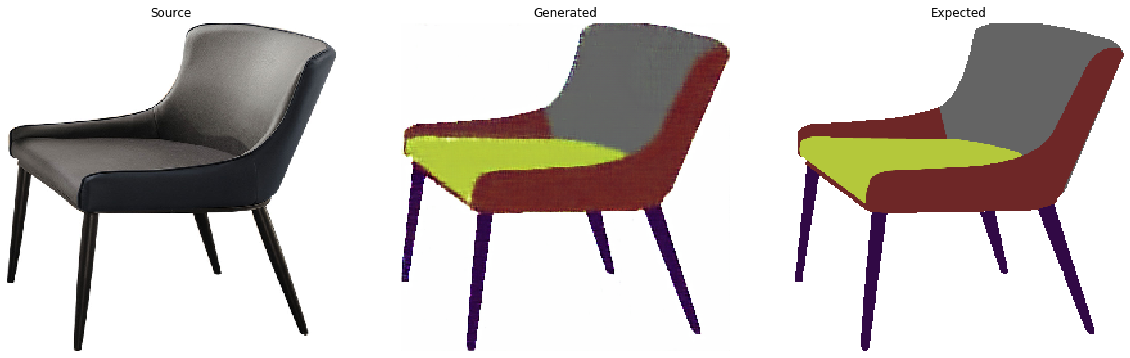

23.097748


In [157]:
# plot all three images
plot_images(src_image, gen_image, tar_image)
gen_image = model.predict(src_image)
print(PSNR(gen_image, tar_image)[0])

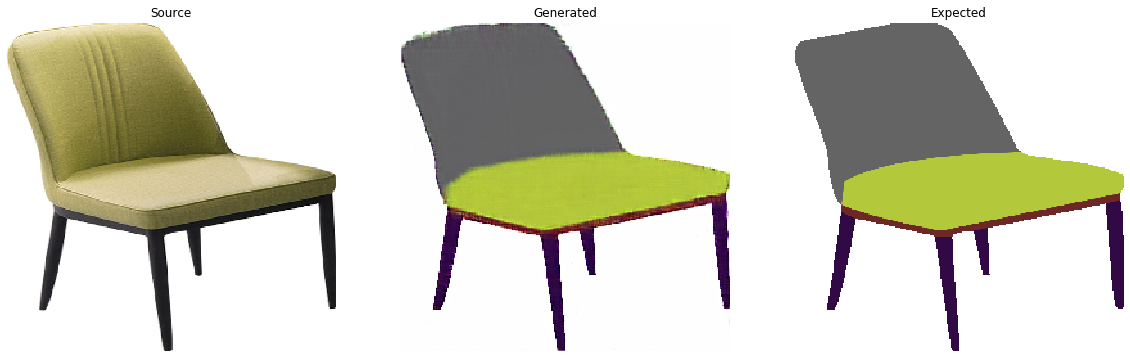

19.081614


In [154]:
# plot all three images
plot_images(src_image, gen_image, tar_image)
gen_image = model.predict(src_image)
print(PSNR(gen_image, tar_image)[0])

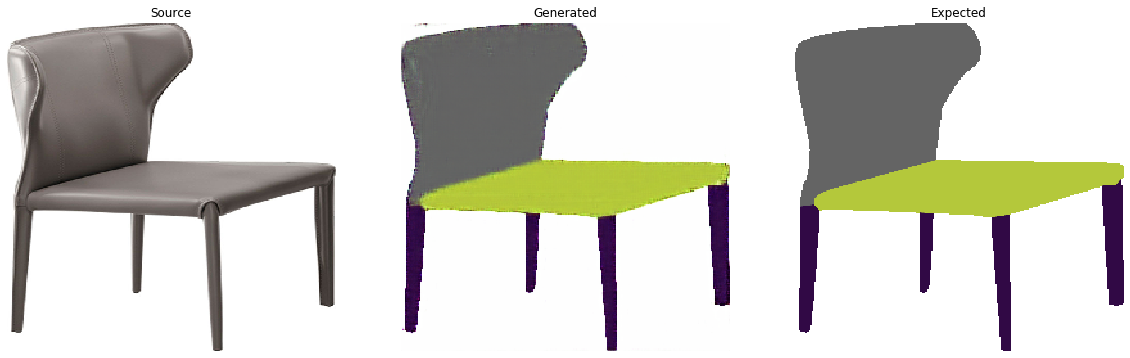

24.61939


In [158]:
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict(src_image)
plot_images(src_image, gen_image, tar_image)
print(PSNR(gen_image, tar_image)[0])

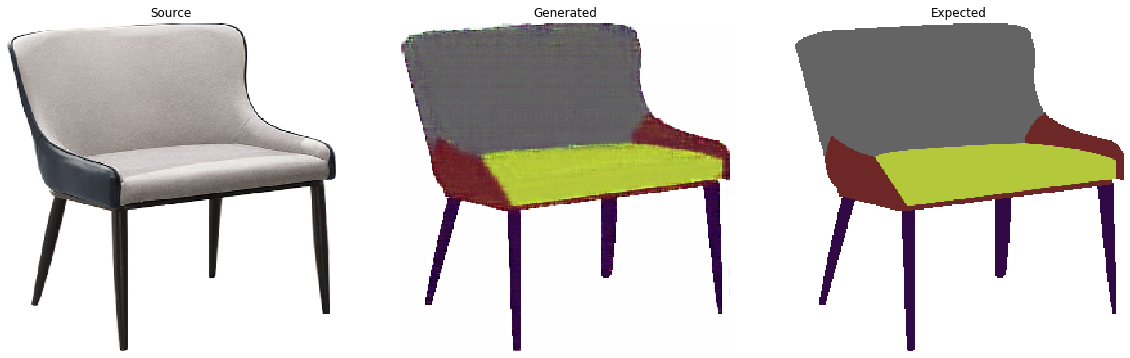

22.435658


In [159]:
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict(src_image)
plot_images(src_image, gen_image, tar_image)
print(PSNR(gen_image, tar_image)[0])

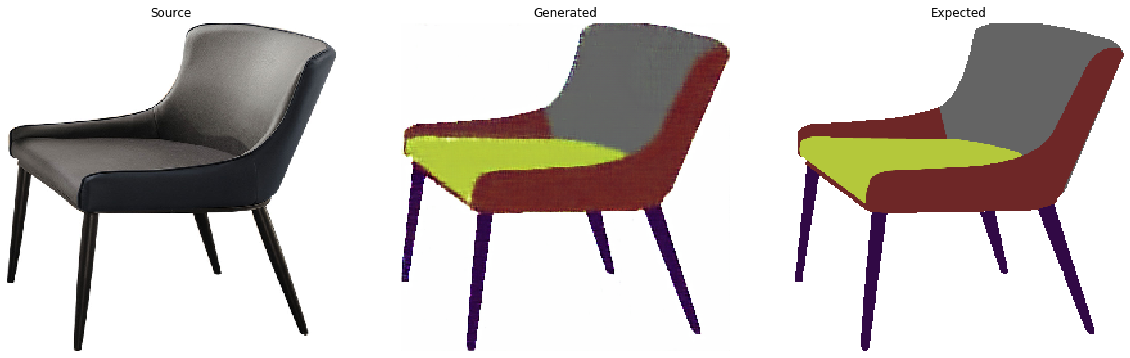

23.097748


In [164]:
# select random example
ix = randint(0, len(X1), 1)
#print(ix)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict(src_image)
plot_images(src_image, gen_image, tar_image)
print(PSNR(gen_image, tar_image)[0])

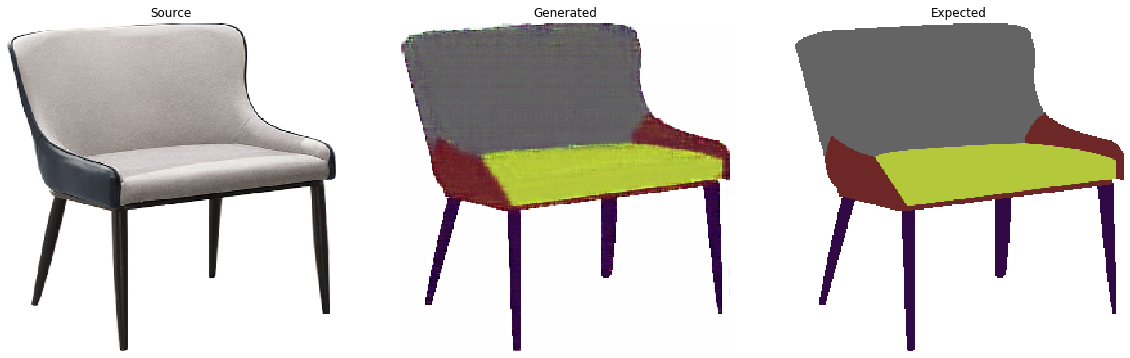

22.435658


In [161]:
# select random example
ix = randint(0, len(X1), 1)
#print(ix)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict(src_image)
plot_images(src_image, gen_image, tar_image)
print(PSNR(gen_image, tar_image)[0])

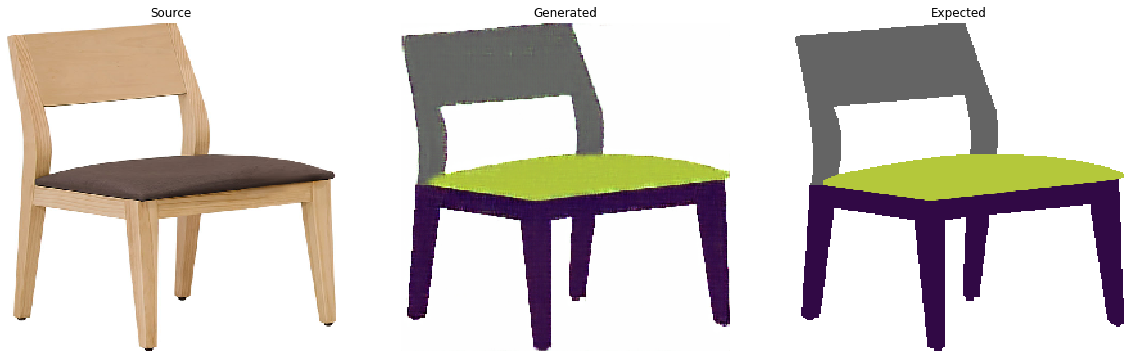

23.369509


In [162]:
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict(src_image)
plot_images(src_image, gen_image, tar_image)
print(PSNR(gen_image, tar_image)[0])

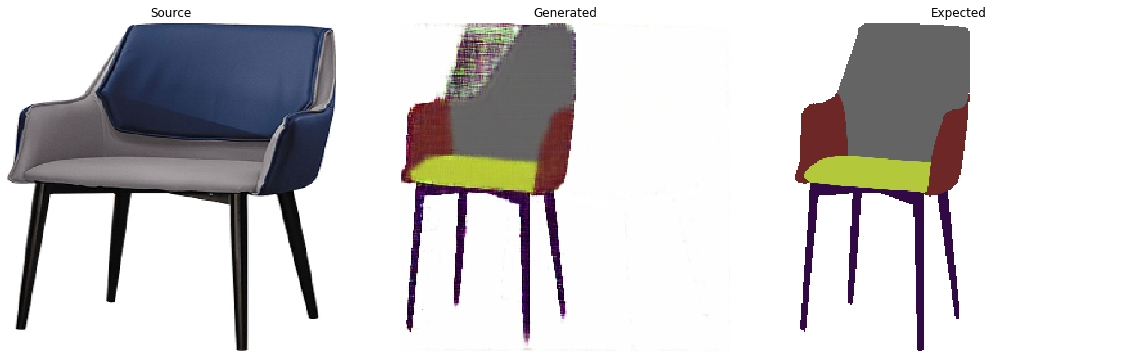

18.645336


In [163]:
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict(src_image)
plot_images(src_image, gen_image, tar_image)
print(PSNR(gen_image, tar_image)[0])

# 4. Training Result

In [128]:
import tensorflow as tf
def PSNR(gen_img, tar_img):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        y=sess.run(tf.image.psnr(gen_img,tar_img,max_val=1))
        return y

In [129]:
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict(src_image)
print(PSNR(gen_image, tar_image))
print(PSNR(gen_image, tar_image)[0])

[14.3288145]
14.3288145


In [165]:
performance=[]
for i in range(X1.shape[0]):
    #src_image, tar_image = X1[i], X2[i]
    src_image, tar_image = X1[i].reshape(1,256,256,3), X2[i].reshape(1,256,256,3)
    gen_image = model.predict(src_image)
    print(i)
    performance.append(PSNR(gen_image, tar_image)[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [166]:
sum(performance)/len(performance)

22.307369232177734